In [1]:
import os
import sys
import pandas as pd
import numpy as np
import numpy.random as npr
import glob
from nltk.tokenize import WordPunctTokenizer
from nltk import FreqDist
import matplotlib.pyplot as plt
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def loader(dir):
    '''load all files in a dir in to a dictionary {filename: [tokens]}
    '''
    wpt = WordPunctTokenizer()
    dir_corpus = {}
    for filename in glob.glob('{}/*.txt'.format(dir)):
        with open(filename,"r") as file:
            word_list = []
            for line in file.readlines():
                word_list += [word.lower() for word in wpt.tokenize(line)]
            dir_corpus[os.path.basename(filename)+"_from_"+os.path.basename(dir)] = word_list

    return dir_corpus

def loader_string(dir):
    dir_string = ""
    for filename in glob.glob('{}/*.txt'.format(dir)):
        with open(filename,"r") as file:
            for line in file.readlines():
                dir_string += line
    return dir_string

In [3]:
corpus = loader("/Users/xiaoli/Desktop/Studium/GU/WS19:20/NLP/a2-guslixiy/reuters-topics/crude")

In [4]:
#basename(path) from os.path


def part1_load(folder1, folder2):
    corpus1 = loader(folder1)
    corpus2 = loader(folder2)
    
    all_words_pool = []
    for key, value in corpus1.items():
        all_words_pool += value
    for key, value in corpus2.items():
        all_words_pool += value
        
    fd = FreqDist(all_words_pool)
    frequent_words = []
    for word, count in fd.items():
        if word.isalpha() and count > 1000: #n=100
            frequent_words.append(word)  
    print(frequent_words)
    
    #list of tuple to be written in dataframe
    data = []
    for key, value in corpus1.items():
        count = []
        filename, dirname = key.split("_from_")
        for word in frequent_words:
            count.append(value.count(word))
        list_to_add = ([filename,dirname]+count)
        data.append(list_to_add)
    for key, value in corpus2.items():
        count = []
        filename, dirname = key.split("_from_")
        for word in frequent_words:
            count.append(value.count(word))
        list_to_add = ([filename,dirname]+count)
        data.append(list_to_add)
        
    
    df = pd.DataFrame(data, columns =(['Filename', 'Dirname']+frequent_words)) 
            
    return df

In [5]:
df = part1_load("/Users/xiaoli/Desktop/Studium/GU/WS19:20/NLP/a2-guslixiy/reuters-topics/crude", "/Users/xiaoli/Desktop/Studium/GU/WS19:20/NLP/a2-guslixiy/reuters-topics/grain")

['the', 'of', 'in', 'and', 'to', 'said', 'a', 'be', 'it', 'u', 's', 'will', 'oil', 'for', 'dlrs', 'mln', 'pct', 'was', 'that', 'on', 'from', 'is', 'by', 'at', 'tonnes', 'wheat']


In [6]:
df.head()

,Filename,Dirname,the,of,in,and,to,said,a,be,...,pct,was,that,on,from,is,by,at,tonnes,wheat
0,article545.txt,crude,24,6,7,5,5,4,1,1,...,0,0,0,0,0,0,0,0,0,0
1,article223.txt,crude,29,13,19,18,15,15,21,1,...,1,5,2,4,7,2,1,0,0,0
2,article237.txt,crude,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
3,article551.txt,crude,3,2,1,4,6,5,5,0,...,0,0,0,0,0,2,1,0,0,0
4,article009.txt,crude,7,0,5,1,5,5,3,0,...,10,4,0,0,10,0,1,1,0,0


## Part2

In [7]:
def part2_vis(df):
    # DO NOT CHANGE
    assert isinstance(df, pd.DataFrame)
    
    df_to_plot = df[:,2:]

    return df.plot(kind="bar")

In [8]:
sort_by_class = df.sort_values("Dirname")

In [9]:
classes = set(sort_by_class["Dirname"])

In [10]:
sorted_df = {}
for classname in classes:
    sorted_df[classname] = (df[df["Dirname"] == classname]).to_numpy()

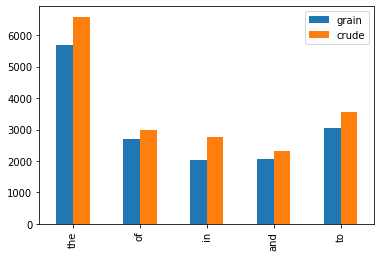

In [11]:
sum_rows = {}
for k,y in sorted_df.items():
    sum_row = y[:, 2:7]
    sum_rows['{}'.format(k)] = (np.sum(sum_row,axis=0))
index = sort_by_class.columns[2:7]

df_to_plot = pd.DataFrame(sum_rows, index=index)
ax = df_to_plot.plot.bar()


## Part3

In [12]:
np_raw = df.iloc[:,2:].to_numpy()
np_extra = df.iloc[:,:2].to_numpy()

In [13]:
np_raw.shape

(1160, 26)

In [14]:
tf = np.zeros(np_raw.shape)

In [15]:
for i in range(np_raw.shape[0]):
    row_sum = np.sum(np_raw[i])
    for j in range(np_raw.shape[1]):
        tf[i][j] = (np_raw[i][j])/ row_sum

In [16]:
tf

array([[0.40677966, 0.10169492, 0.11864407, ..., 0.        , 0.        ,
        0.        ],
       [0.13809524, 0.06190476, 0.09047619, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.125     , 0.0625    , 0.        , ..., 0.125     , 0.        ,
        0.1875    ],
       [0.17293233, 0.08270677, 0.04511278, ..., 0.0075188 , 0.        ,
        0.0075188 ],
       [0.25581395, 0.13953488, 0.02325581, ..., 0.        , 0.11627907,
        0.02325581]])

In [17]:
idf = np.zeros(np_raw.shape)

In [18]:
transposed_np = np_raw.T

In [19]:
transposed_np.shape

(26, 1160)

In [20]:
for i in range(transposed_np.shape[0]):
    count = list(transposed_np[i]>0).count(True)
    idf_value = np.log((transposed_np.shape[0]*transposed_np.shape[1])/count)
    for j in range(transposed_np.shape[1]):
        idf[j,i] = idf_value

In [21]:
idf.shape

(1160, 26)

In [23]:
idf

array([[3.38769479, 3.44214372, 3.52755487, ..., 3.92068107, 4.51821407,
        4.57769952],
       [3.38769479, 3.44214372, 3.52755487, ..., 3.92068107, 4.51821407,
        4.57769952],
       [3.38769479, 3.44214372, 3.52755487, ..., 3.92068107, 4.51821407,
        4.57769952],
       ...,
       [3.38769479, 3.44214372, 3.52755487, ..., 3.92068107, 4.51821407,
        4.57769952],
       [3.38769479, 3.44214372, 3.52755487, ..., 3.92068107, 4.51821407,
        4.57769952],
       [3.38769479, 3.44214372, 3.52755487, ..., 3.92068107, 4.51821407,
        4.57769952]])

In [24]:
tf_idf = tf * idf

In [25]:
tf_idf

array([[1.37804534, 0.35004851, 0.41852346, ..., 0.        , 0.        ,
        0.        ],
       [0.46782452, 0.21308509, 0.31915973, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.42346185, 0.21513398, 0.        , ..., 0.49008513, 0.        ,
        0.85831866],
       [0.58584196, 0.28468858, 0.15913781, ..., 0.02947881, 0.        ,
        0.03441879],
       [0.8666196 , 0.48029912, 0.08203616, ..., 0.        , 0.52537373,
        0.10645813]])

In [26]:
tf_idf.shape

(1160, 26)

In [27]:
np_extra.shape

(1160, 2)

In [28]:
data = np.hstack((np_extra,tf_idf))
data = pd.DataFrame(data).fillna(0).to_numpy()

In [29]:
np_extra

array([['article545.txt', 'crude'],
       ['article223.txt', 'crude'],
       ['article237.txt', 'crude'],
       ...,
       ['article212.txt', 'grain'],
       ['article206.txt', 'grain'],
       ['article560.txt', 'grain']], dtype=object)

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
np.random.shuffle(data)

In [32]:
X = data[:,2:]
Y = data[:,1]
Xtrain = X[:-100,]
Ytrain = Y[:-100,]
Xtest = X[-100:,]
Ytest = Y[-100:,]

print(X.shape)
print(Y.shape)


(1160, 26)
(1160,)


In [33]:
Xtrain

array([[0.34745587578452997, 0.0, 0.09045012491068748, ..., 0.0, 0.0,
        0.35213073266482314],
       [0.4024983907602971, 0.4430482016849286, 0.27941028685281677, ...,
        0.15527449774935687, 0.0, 0.0],
       [0.33876947888991676, 0.258160779058718, 0.0, ...,
        0.3920681068171261, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.8121186137771976, 0.25933959540145185, 0.1932906778913321, ...,
        0.026853979918981235, 0.0, 0.1881246379990151],
       [0.9239167606088639, 0.4693832346522145, 0.08017170162538208, ...,
        0.0891063879129832, 0.0, 0.0]], dtype=object)

In [34]:
Ytrain

array(['grain', 'crude', 'crude', ..., 'crude', 'grain', 'crude'],
      dtype=object)

In [35]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print ("Classification rate for NB", model.score(Xtest, Ytest))

Classification rate for NB 0.9


In [36]:
print(data[0])

['article172.txt' 'grain' 0.34745587578452997 0.0 0.09045012491068748
 0.4446656342125439 0.26328045577458764 0.0 0.36343409212440125 0.0 0.0
 0.10189519277933692 0.18078461944254987 0.0 0.0 0.0 0.0
 1.2785158257322953 0.0 0.0 0.0 0.0 0.40668029033252245 0.0 0.0 0.0 0.0
 0.35213073266482314]


In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
model = AdaBoostClassifier()

In [39]:
model.fit(Xtrain, Ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [41]:
print ("Classification rate for Ada", model.score(Xtest, Ytest))

Classification rate for Ada 0.96


In [51]:
predicts = model.predict(Xtest)
current_i = 0

for i in range (0,len(predicts)):
    if predicts[i] != Ytest[i]:
        print(i)
        
print(df.iloc[63])
    

5
37
45
63
Filename    article157.txt
Dirname              crude
the                      7
of                       3
in                       1
and                      4
to                       1
said                     3
a                        2
be                       3
it                       2
u                        3
s                        4
will                     4
oil                      1
for                      3
dlrs                     0
mln                      0
pct                      0
was                      2
that                     4
on                       1
from                     0
is                       1
by                       1
at                       0
tonnes                   0
wheat                    0
Name: 63, dtype: object


In [40]:
df = part1_load("crude","grain")

['the', 'of', 'in', 'and', 'to', 'said', 'a', 'be', 'it', 'u', 's', 'will', 'oil', 'for', 'dlrs', 'mln', 'pct', 'was', 'that', 'on', 'from', 'is', 'by', 'at', 'tonnes', 'wheat']


In [41]:
df

,Filename,Dirname,the,of,in,and,to,said,a,be,...,pct,was,that,on,from,is,by,at,tonnes,wheat
0,article545.txt,crude,24,6,7,5,5,4,1,1,...,0,0,0,0,0,0,0,0,0,0
1,article223.txt,crude,29,13,19,18,15,15,21,1,...,1,5,2,4,7,2,1,0,0,0
2,article237.txt,crude,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
3,article551.txt,crude,3,2,1,4,6,5,5,0,...,0,0,0,0,0,2,1,0,0,0
4,article009.txt,crude,7,0,5,1,5,5,3,0,...,10,4,0,0,10,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,article548.txt,grain,14,4,3,0,12,7,2,1,...,0,5,4,1,0,2,1,1,1,8
1156,article574.txt,grain,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1157,article212.txt,grain,2,1,0,0,0,0,0,0,...,0,2,0,2,0,0,0,2,0,3
1158,article206.txt,grain,23,11,6,13,12,14,7,2,...,2,3,7,3,3,1,1,1,0,1


In [1]:
import os
import sys
import pandas as pd
import numpy as np
import numpy.random as npr
import glob
from nltk.tokenize import WordPunctTokenizer
from nltk import FreqDist
import matplotlib.pyplot as plt
np.seterr(invalid='ignore')


def part1_load(folder1, folder2):
    '''This function takes two dirs and return a dataframe with each article per row and in columns filename, class(dir)
    and the absolute frequency of words more frequent than n(n=1000) are shown'''
    corpus1 = loader(folder1)
    corpus2 = loader(folder2)

    all_words_pool = []
    # a list of all the words in the corpus put together
    for key, value in corpus1.items():
        all_words_pool += value
    for key, value in corpus2.items():
        all_words_pool += value

    fd = FreqDist(all_words_pool)
    # build a distribution frequency of the words
    frequent_words = []
    for word, count in fd.items():
        if word.isalpha() and count > 1000:  # n=100
        # if the word(token) consists only letters and occurs more than 1000 times in the corpus
            frequent_words.append(word)

    data = []
    # list of tuple to be written in dataframe
    for key, value in corpus1.items():
    # iterate thourgh all the files in corpus1 and build a list with [filename, dirname and count0,count1,count2...]
        count = []
        filename, dirname = key.split("_from_")

        for word in frequent_words:
            count.append(value.count(word))
        list_to_add = ([filename, dirname] + count)
        data.append(list_to_add)
    for key, value in corpus2.items():
        # iterate thourgh all the files in corpus1 and build a list with [filename, dirname and count0,count1,count2...]
        count = []
        filename, dirname = key.split("_from_")
        for word in frequent_words:
            count.append(value.count(word))
        list_to_add = ([filename, dirname] + count)
        data.append(list_to_add)

    pd.DataFrame(data).fillna(0).to_numpy()

    df = pd.DataFrame(data, columns=(['Filename', 'Dirname'] + frequent_words))
    
    # create a dataframe with head(title) accordinly
    pd.DataFrame(df).fillna(0).to_numpy()
    return df


def part2_vis(df):
    # DO NOT CHANGE
    assert isinstance(df, pd.DataFrame)

    # CHANGE WHAT YOU WANT HERE
    #-------from here----------

    sort_by_class = df.sort_values("Dirname")
    classes = set(sort_by_class["Dirname"])
    sorted_df = {}
    # create a dictionary with {class: dataframe of the class}
    for classname in classes:
        sorted_df[classname] = (df[df["Dirname"] == classname]).to_numpy()

    sum_rows = {}
    # plot the most frequent 5 words (m=5) for readability
    for k, y in sorted_df.items():
        sum_row = y[:, 2:7]
        sum_rows['{}'.format(k)] = (np.sum(sum_row, axis=0))
    index = sort_by_class.columns[2:7]

    df_to_plot = pd.DataFrame(sum_rows, index=index)
    ax = df_to_plot.plot.bar()


def part3_tfidf(df):
    # DO NOT CHANGE
    assert isinstance(df, pd.DataFrame)

    # CHANGE WHAT YOU WANT HERE
    #-------from here----------
    columns = df.columns
    np_raw = df.iloc[:, 2:].to_numpy()
    # a 2-d np maxtrix only contains the count data
    np_extra = df.iloc[:, :2].to_numpy()
    # a 2-d np maxtrix contains the files name and class information

    # calculation of tp
    tf = np.zeros(np_raw.shape)
    # a default matrix filled with 0 to receive the tf values

    for i in range(np_raw.shape[0]):
    # go through each row(file)
        row_sum = np.sum(np_raw[i])
        # number of total words in that file
        for j in range(np_raw.shape[1]):
        # term frequency = word-count/total number of words in that file
            tf[i][j] = (np_raw[i][j]) / row_sum
            # update the tf matrix

    # calculation of idf
    idf = np.zeros(np_raw.shape)
    # a default matrix filled with 0 to receive the tf values

    transposed_np = np_raw.T
    # tranpose the np_raw matrix to iterate over the column(rows/words)

    for i in range(transposed_np.shape[0]):
        # go through all the words(row)
        count = list(transposed_np[i] > 0).count(True)
        # number of files containing the word
        idf_value = np.log((transposed_np.shape[0] * transposed_np.shape[1]) / count)
        # idf = log(N/nt) i.e. log(total number of files/ number of files containing word t)
        for j in range(transposed_np.shape[1]):
            idf[j, i] = idf_value
            #update the idf matraix

    tf_idf = tf * idf
    #tf_idf matrix

    data = np.hstack((np_extra,tf_idf))
    # glue the matrix with extra information together
    data = pd.DataFrame(data).fillna(0)
    # fill the invalid cells with 0 as required in part1
    data.columns = columns

    return data

# ADD WHATEVER YOU NEED HERE, INCLUDING BONUS CODE.

def loader(dir):
    '''load all files in a dir in to a dictionary {filename: [text file with words as tokens]}
    '''
    wpt = WordPunctTokenizer()
    dir_corpus = {}
    for filename in glob.glob('{}/*.txt'.format(dir)):
        with open(filename,"r") as file:
            word_list = []
            for line in file.readlines():
                word_list += [word.lower() for word in wpt.tokenize(line)]
            dir_corpus[os.path.basename(filename)+"_from_"+os.path.basename(dir)] = word_list

    return dir_corpus

#bonus part
print("###Training with freqeuncy")
data = df.to_numpy()
from sklearn.naive_bayes import MultinomialNB
np.random.shuffle(data)
#shuffle the data is the output from part 3 if-idf matrix
X = data[:,2:]
#characters
Y = data[:,1]
#class information
Xtrain = X[:-100,]
#slicing
Ytrain = Y[:-100,]
#slicing
Xtest = X[-100:,]
#slicing
Ytest = Y[-100:,]
#slicing

model = MultinomialNB()
model.fit(Xtrain,Ytrain)
#training
print ("Classification rate for NB", model.score(Xtest, Ytest))
#testing

print("###Training with td-idf")

data = part3_tfidf(part1_load('crude','grain')).to_numpy()

from sklearn.naive_bayes import MultinomialNB
np.random.shuffle(data)
#shuffle the data is the output from part 3 if-idf matrix
X = data[:,2:]
#characters
Y = data[:,1]
#class information
Xtrain = X[:-100,]
#slicing
Ytrain = Y[:-100,]
#slicing
Xtest = X[-100:,]
#slicing
Ytest = Y[-100:,]
#slicing

model = MultinomialNB()
model.fit(Xtrain,Ytrain)
#training
print ("Classification rate for NB", model.score(Xtest, Ytest))
#testing


###Training with freqeuncy


NameError: name 'df' is not defined

In [43]:
part1_load("crude","grain")

,Filename,Dirname,the,of,in,and,to,said,a,be,...,pct,was,that,on,from,is,by,at,tonnes,wheat
0,article545.txt,crude,24,6,7,5,5,4,1,1,...,0,0,0,0,0,0,0,0,0,0
1,article223.txt,crude,29,13,19,18,15,15,21,1,...,1,5,2,4,7,2,1,0,0,0
2,article237.txt,crude,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
3,article551.txt,crude,3,2,1,4,6,5,5,0,...,0,0,0,0,0,2,1,0,0,0
4,article009.txt,crude,7,0,5,1,5,5,3,0,...,10,4,0,0,10,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,article548.txt,grain,14,4,3,0,12,7,2,1,...,0,5,4,1,0,2,1,1,1,8
1156,article574.txt,grain,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1157,article212.txt,grain,2,1,0,0,0,0,0,0,...,0,2,0,2,0,0,0,2,0,3
1158,article206.txt,grain,23,11,6,13,12,14,7,2,...,2,3,7,3,3,1,1,1,0,1


In [44]:
df = part1_load("crude","grain")

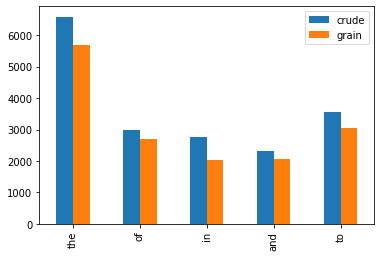

In [45]:
part2_vis(df)

In [46]:
part3_tfidf(df)

,Filename,Dirname,the,of,in,and,to,said,a,be,...,pct,was,that,on,from,is,by,at,tonnes,wheat
0,article545.txt,crude,1.378045,0.350049,0.418523,0.293932,0.290055,0.233789,0.060059,0.069656,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,article223.txt,crude,0.467825,0.213085,0.319160,0.297291,0.244475,0.246313,0.354348,0.019570,...,0.021234,0.097754,0.039237,0.074616,0.132171,0.038241,0.018742,0.000000,0.000000,0.000000
2,article237.txt,crude,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.311949,0.000000,0.000000,0.000000
3,article551.txt,crude,0.230979,0.156461,0.080172,0.315308,0.466724,0.391861,0.402668,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.182515,0.089451,0.000000,0.000000,0.000000
4,article009.txt,crude,0.307972,0.000000,0.229062,0.045044,0.222250,0.223921,0.138058,0.000000,...,0.579117,0.213282,0.000000,0.000000,0.514952,0.000000,0.051115,0.050918,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,article548.txt,grain,0.564616,0.163912,0.125984,0.000000,0.488949,0.287365,0.084369,0.048925,...,0.000000,0.244386,0.196184,0.046635,0.000000,0.095603,0.046855,0.046675,0.053788,0.435971
1156,article574.txt,grain,0.000000,0.000000,0.000000,0.000000,0.855661,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.129554,0.000000
1157,article212.txt,grain,0.423462,0.215134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.513210,0.000000,0.489668,0.000000,0.000000,0.000000,0.490085,0.000000,0.858319
1158,article206.txt,grain,0.585842,0.284689,0.159138,0.339016,0.308810,0.362987,0.186499,0.061800,...,0.067056,0.092609,0.216835,0.088361,0.089439,0.030190,0.029593,0.029479,0.000000,0.034419


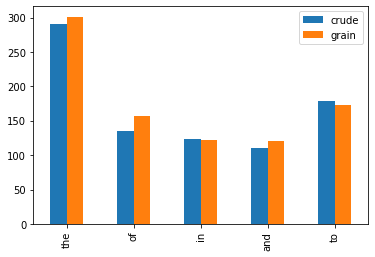

In [47]:
part2_vis((part3_tfidf(df)))

In [103]:
from wordcloud import wordcloud

In [104]:
df[df["Dirname"]=="crude"]

,Filename,Dirname,the,of,in,and,to,said,a,be,...,pct,was,that,on,from,is,by,at,tonnes,wheat
0,article545.txt,crude,24,6,7,5,5,4,1,1,...,0,0,0,0,0,0,0,0,0,0
1,article223.txt,crude,29,13,19,18,15,15,21,1,...,1,5,2,4,7,2,1,0,0,0
2,article237.txt,crude,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
3,article551.txt,crude,3,2,1,4,6,5,5,0,...,0,0,0,0,0,2,1,0,0,0
4,article009.txt,crude,7,0,5,1,5,5,3,0,...,10,4,0,0,10,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,article548.txt,crude,7,3,3,3,4,3,4,0,...,0,0,1,1,1,2,0,1,0,0
574,article574.txt,crude,7,3,1,1,5,3,3,0,...,0,1,2,0,2,1,0,1,0,0
575,article212.txt,crude,28,9,6,6,8,8,4,0,...,6,3,1,1,2,0,7,1,0,0
576,article206.txt,crude,8,1,3,2,1,3,1,0,...,0,0,0,0,2,0,2,0,0,0


In [105]:
crude = loader("/Users/xiaoli/Desktop/Studium/GU/WS19:20/NLP/a2-guslixiy/reuters-topics/crude")
grain = loader("/Users/xiaoli/Desktop/Studium/GU/WS19:20/NLP/a2-guslixiy/reuters-topics/grain")

In [106]:
crude_df = pd.DataFrame(crude.items())
grain_df = pd.DataFrame(grain.items())

In [107]:
crude_string = loader_string("/Users/xiaoli/Desktop/Studium/GU/WS19:20/NLP/a2-guslixiy/reuters-topics/crude")
grain_string = loader_string("/Users/xiaoli/Desktop/Studium/GU/WS19:20/NLP/a2-guslixiy/reuters-topics/grain")

In [108]:
crude_wordcloud = wordcloud.WordCloud().generate(crude_string)
grain_wordcloud = wordcloud.WordCloud().generate(grain_string)

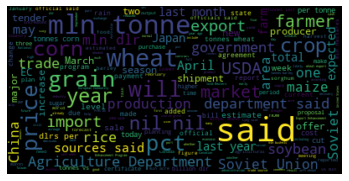

In [109]:
import matplotlib.pyplot as plt


# lower max_font_size
wordcloud= wordcloud.WordCloud(max_font_size=40).generate(grain_string)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

AttributeError: 'WordCloud' object has no attribute 'WordCloud'

In [22]:
def part1_load(folder1, folder2, n = 1):
    '''This function takes two dirs and return a dataframe with each article per row and in columns filename, class(dir)
    and the absolute frequency of words more frequent than n(n=1000) are shown'''
    corpus1 = loader(folder1)
    corpus2 = loader(folder2)

    all_words_pool = []
    # a list of all the words in the corpus put together
    for key, value in corpus1.items():
        all_words_pool += value
    for key, value in corpus2.items():
        all_words_pool += value

    fd = FreqDist(all_words_pool)
    # build a distribution frequency of the words
    #frequent_words = []
    #for word, count in fd.items():
    tuples = fd.items()
    tuples.sort(key = lambda x: x[1])
    frequent_word = [item[0] for item in tuples]
    print(frequent_word)
        #if word.isalpha() and count > n:  # n=100
            # if the word(token) consists only letters and occurs more than 1000 times in the corpus
            #frequent_words.append(word)
    
    data = []
    # list of tuple to be written in dataframe
    for key, value in corpus1.items():
        # iterate thourgh all the files in corpus1 and build a list with [filename, dirname and count0,count1,count2...]
        count = []
        filename, dirname = key.split("_from_")

        for word in frequent_words:
            count.append(value.count(word))
        list_to_add = ([filename, dirname] + count)
        data.append(list_to_add)
    for key, value in corpus2.items():
        # iterate thourgh all the files in corpus1 and build a list with [filename, dirname and count0,count1,count2...]
        count = []
        filename, dirname = key.split("_from_")
        for word in frequent_words:
            count.append(value.count(word))
        list_to_add = ([filename, dirname] + count)
        data.append(list_to_add)

    pd.DataFrame(data).fillna(0).to_numpy()

    df = pd.DataFrame(data, columns=(['Filename', 'Dirname'] + frequent_words))

    # create a dataframe with head(title) accordinly
    pd.DataFrame(df).fillna(0).to_numpy()
    return df

IndentationError: unexpected indent (<ipython-input-22-5140aa4e4d88>, line 18)